# Compute performance metrics for the given Y and Y_score without sklearn

In [201]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [202]:
df=pd.read_csv('5_a.csv')
df.head()

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199


In [203]:
y_hat=np.zeros(len(df))
for i in range(len(df)):
    if df.loc[i,'proba']>=0.5:
        y_hat[i]=1
    elif df.loc[i,'proba']<0.5:
        y_hat[i]=0

In [204]:
df['y_hat']=y_hat
df.head()

,y,proba,y_hat
0,1.0,0.637387,1.0
1,1.0,0.635165,1.0
2,1.0,0.766586,1.0
3,1.0,0.724564,1.0
4,1.0,0.889199,1.0


In [205]:
TP=0
TN=0
FP=0
FN=0
conf_mat=np.zeros((2,2))
for i in range(len(df)):
    if df.loc[i,'y']==1.0 and df.loc[i,'y_hat']==1.0:
        TP=TP+1
    elif df.loc[i,'y']==1.0 and df.loc[i,'y_hat']==0.0:
        FN=FN+1
    elif df.loc[i,'y']==0.0 and df.loc[i,'y_hat']==1.0:
        FP=FP+1
    elif df.loc[i,'y']==0.0 and df.loc[i,'y_hat']==0.0:
        TN=TN+1
conf_mat[0][0]=TN
conf_mat[0][1]=FN
conf_mat[1][0]=FP
conf_mat[1][1]=TP


print('Confusion Matrix:\n',conf_mat)

Confusion Matrix:
 [[    0.     0.]
 [  100. 10000.]]


In [206]:
accuracy=(TP+TN)/(TP+TN+FN+FP)
print('Accuracy:{}'.format(accuracy))

Accuracy:0.9900990099009901


In [207]:
precision=TP/(TP+FP)
recall = TP/(TP+FN)
f1_score=(2*precision*recall)/(precision+recall)
print('F1 Score:',f1_score)

F1 Score: 0.9950248756218906


In [208]:
sorted_df=df.sort_values('proba',ascending=False)
sorted_df=sorted_df.reset_index(drop=True)

In [209]:
probability_score=sorted_df['proba'].to_numpy()
y_hat=np.zeros(len(sorted_df))
y=sorted_df['y'].to_numpy()

In [210]:
tpr=np.zeros(len(sorted_df))
fpr=np.zeros(len(sorted_df))


from tqdm import tqdm 
for i in tqdm(range(len(sorted_df))):
    TP=0
    TN=0
    FP=0
    FN=0
    threshold= probability_score[i]
    for j in range(len(sorted_df)):
        if probability_score[j]<threshold:
            y_hat[j]=0
            if y[j]==1.0:
                FN=FN+1
            elif y[j]==0.0:
                TN=TN+1    
        elif probability_score[j]>=threshold:
            y_hat[j]=1
            if y[j]==1.0:
                TP=TP+1
            elif y[j]==0.0:
                FP=FP+1
    tpr[i]=TP/(TP+FN)
    fpr[i]=FP/(FP+TN)


100%|████████████████████████████████████████████████████████████████████████████| 10100/10100 [02:33<00:00, 65.61it/s]


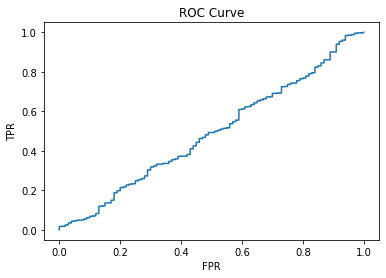

In [211]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [212]:
AUC_score=np.trapz(tpr,fpr)
print('AUC_score:',AUC_score)

AUC_score: 0.48829900000000004


<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [213]:
df=pd.read_csv('5_b.csv')
df.head()

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [214]:
y_hat=np.zeros(len(df))
for i in range(len(df)):
    if df.loc[i,'proba']>=0.5:
        y_hat[i]=1
    elif df.loc[i,'proba']<0.5:
        y_hat[i]=0

In [215]:
df['y_hat']=y_hat
df.head()

,y,proba,y_hat
0,0.0,0.281035,0.0
1,0.0,0.465152,0.0
2,0.0,0.352793,0.0
3,0.0,0.157818,0.0
4,0.0,0.276648,0.0


In [216]:
TP=0
TN=0
FP=0
FN=0
conf_mat=np.zeros((2,2))
for i in range(len(df)):
    if df.loc[i,'y']==1.0 and df.loc[i,'y_hat']==1.0:
        TP=TP+1
    elif df.loc[i,'y']==1.0 and df.loc[i,'y_hat']==0.0:
        FN=FN+1
    elif df.loc[i,'y']==0.0 and df.loc[i,'y_hat']==1.0:
        FP=FP+1
    elif df.loc[i,'y']==0.0 and df.loc[i,'y_hat']==0.0:
        TN=TN+1
conf_mat[0][0]=TN
conf_mat[0][1]=FN
conf_mat[1][0]=FP
conf_mat[1][1]=TP


print('Confusion Matrix:\n',conf_mat)


Confusion Matrix:
 [[9761.   45.]
 [ 239.   55.]]


In [217]:
accuracy=(TP+TN)/(TP+TN+FN+FP)
print('Accuracy:{}'.format(accuracy))

Accuracy:0.9718811881188119


In [218]:

precision=TP/(TP+FP)
recall = TP/(TP+FN)
f1_score=(2*precision*recall)/(precision+recall)
print('F1 Score:',f1_score)


F1 Score: 0.2791878172588833


In [219]:

sorted_df=df.sort_values('proba',ascending=False)
sorted_df=sorted_df.reset_index(drop=True)


In [220]:
sorted_df

,y,proba,y_hat
0,1.0,0.595294,1.0
1,1.0,0.594808,1.0
2,1.0,0.592198,1.0
3,1.0,0.590171,1.0
4,1.0,0.588718,1.0
...,...,...,...
10095,0.0,0.100230,0.0
10096,0.0,0.100189,0.0
10097,0.0,0.100165,0.0
10098,0.0,0.100161,0.0


In [221]:
probability_score=sorted_df['proba'].to_numpy()
y_hat=np.zeros(len(sorted_df))
y=sorted_df['y'].to_numpy()

In [222]:
tpr=np.zeros(len(sorted_df))
fpr=np.zeros(len(sorted_df))


for i in tqdm(range(len(sorted_df))):
    TP=0
    TN=0
    FP=0
    FN=0
    threshold= probability_score[i]
    for j in range(len(sorted_df)):
        if probability_score[j]<threshold:
            y_hat[j]=0
            if y[j]==1.0:
                FN=FN+1
            elif y[j]==0.0:
                TN=TN+1    
        elif probability_score[j]>=threshold:
            y_hat[j]=1
            if y[j]==1.0:
                TP=TP+1
            elif y[j]==0.0:
                FP=FP+1
    tpr[i]=TP/(TP+FN)
    fpr[i]=FP/(FP+TN)




100%|████████████████████████████████████████████████████████████████████████████| 10100/10100 [03:56<00:00, 42.80it/s]


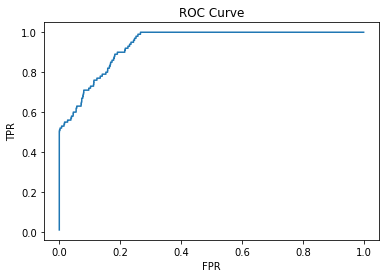

In [223]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [224]:


AUC_score=np.trapz(tpr,fpr)
print('AUC_score:',AUC_score)



AUC_score: 0.9377570000000001


<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [225]:
df=pd.read_csv('5_c.csv')
df.head()

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [226]:

sorted_df=df.sort_values('prob',ascending=False)
sorted_df=sorted_df.reset_index(drop=True)

In [227]:
probability_score=sorted_df['prob'].to_numpy()
y_hat=np.zeros(len(sorted_df))
y=sorted_df['y'].to_numpy()

In [228]:
A=np.zeros(len(sorted_df))
for i in tqdm(range(len(sorted_df))):
    FP=0
    FN=0
    threshold= probability_score[i]
    for j in range(len(sorted_df)):
        if probability_score[j]<threshold:
            y_hat[j]=0
            if y[j]==1.0:
                FN=FN+1
        elif probability_score[j]>=threshold:
            y_hat[j]=1
            if y[j]==0.0:
                FP=FP+1
    A[i]=(500*FN)+(100*FP)

100%|██████████████████████████████████████████████████████████████████████████████| 2852/2852 [00:35<00:00, 81.10it/s]


In [229]:
best_threshold_index=np.where(A==min(A))
print('Best Threshold value:',probability_score[best_threshold_index[0][0]])

Best Threshold value: 0.2300390278970873


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [230]:
df=pd.read_csv('5_d.csv')
df

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0
...,...,...
157195,87.0,83.0
157196,97.0,86.0
157197,106.0,93.0
157198,105.0,101.0


In [231]:
MSE=0
for idx,row in df.iterrows():
    MSE=MSE+((row['y']-row['pred'])**2)
MSE=MSE/len(df)
print('Mean Squared Error:',MSE)

Mean Squared Error: 177.16569974554707


In [232]:
MAPE=0
Error=0
Sum_act_values=0
for idx,row in df.iterrows():
    Error=Error+(abs(row['pred']-row['y']))
    Sum_act_values=Sum_act_values+row['y']
MAPE=(Error/Sum_act_values)*100
print('Mean Actual Percentage Error:',MAPE)

Mean Actual Percentage Error: 12.91202994009687


In [233]:
R_squared_error=0
SS_residual=0
SS_total=0
mean_y=(Sum_act_values/len(df))
for idx,row in df.iterrows():
    SS_residual=SS_residual+((row['y']-row['pred'])**2)
    SS_total=SS_total+((row['y']-mean_y)**2)
R_squared_error=1-(SS_residual/SS_total)
print('R Squared Error:',R_squared_error)

R Squared Error: 0.9563582786990964
